In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
#select fields to be imported from csv
fields = ['acc_open_past_24mths', 'all_util', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_util', 'chargeoff_within_12_mths', 
          'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'emp_length', 'emp_title', 'funded_amnt', 'grade', 'home_ownership', 
          'inq_last_12m', 'installment', 'int_rate', 'loan_amnt', 'loan_status', 'num_accts_ever_120_pd', 'num_tl_90g_dpd_24m', 
          'num_tl_op_past_12m', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 
          'purpose', 'revol_bal', 'revol_util', 'tot_cur_bal', 'verification_status']

In [3]:
# read in data to dataframe from csv
df = pd.read_csv('loan.csv', skipinitialspace=True, usecols=fields)

In [4]:
# show all columns
pd.set_option('display.max_columns', None)
df.head(5)

,loan_amnt,funded_amnt,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,out_prncp,out_prncp_inv,collections_12_mths_ex_med,application_type,tot_cur_bal,all_util,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_util,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies
0,2500,2500,13.56,84.92,C,Chef,10+ years,RENT,55000.0,Not Verified,Current,debt_consolidation,18.24,0.0,9.0,1.0,4341,10.3,2386.02,2386.02,0.0,Individual,16901.0,28.0,2.0,9.0,1878.0,5.9,0.0,0.0,0.0,3.0,100.0,0.0,1.0
1,30000,30000,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Current,debt_consolidation,26.52,0.0,13.0,1.0,12315,24.2,29387.75,29387.75,0.0,Individual,321915.0,57.0,2.0,10.0,24763.0,8.3,0.0,0.0,0.0,6.0,95.0,0.0,1.0
2,5000,5000,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Current,debt_consolidation,10.51,0.0,8.0,0.0,4599,19.1,4787.21,4787.21,0.0,Individual,110299.0,35.0,0.0,4.0,18383.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
3,4000,4000,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Current,debt_consolidation,16.74,0.0,10.0,0.0,5468,78.1,3831.93,3831.93,0.0,Individual,305049.0,70.0,3.0,5.0,30505.0,75.2,0.0,0.0,0.0,3.0,100.0,100.0,0.0
4,30000,30000,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Current,debt_consolidation,26.35,0.0,12.0,0.0,829,3.6,29339.02,29339.02,0.0,Individual,116007.0,54.0,0.0,9.0,9667.0,8.9,0.0,0.0,0.0,5.0,92.3,0.0,0.0


In [5]:
#check num of rows and columns
df.shape

(2260668, 35)

In [107]:
df.dtypes

loan_amnt                       int64
funded_amnt                     int64
int_rate                      float64
installment                   float64
grade                          object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
purpose                        object
dti                           float64
delinq_2yrs                   float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util                    float64
collections_12_mths_ex_med    float64
application_type               object
tot_cur_bal                   float64
all_util                      float64
inq_last_12m                  float64
acc_open_past_24mths          float64
avg_cur_bal                   float64
bc_util                       float64
chargeoff_wi

In [6]:
# this analysis will focus on paid and charged off loans only, filtering down here
df = df[(df.loan_status == 'Fully Paid') | (df.loan_status == 'Charged Off')]

In [7]:
# check num of rows and columns in new dataset
df.shape

(1303607, 35)

In [8]:
#divide the data into the two groups that will be analyzed
status = df.groupby('loan_status')

In [9]:
# find averages 
status.mean()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,out_prncp,out_prncp_inv,collections_12_mths_ex_med,tot_cur_bal,all_util,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_util,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,15548.979381,15540.772773,15.712087,464.749514,70327.779235,20.161590,0.352697,11.906472,0.247203,15365.308341,54.896443,0.0,0.0,0.021697,118733.326394,61.808515,2.596922,5.328011,10914.851459,63.842746,0.009754,0.536181,0.099090,2.494885,93.991224,50.212243,0.153561
Fully Paid,14132.493699,14123.689071,12.640755,431.388962,77623.326376,17.780909,0.308802,11.513452,0.207566,16454.632823,51.160233,0.0,0.0,0.015809,146783.162129,57.175871,2.251074,4.535874,14144.311421,59.112734,0.008910,0.502555,0.086364,2.101143,94.218441,44.074606,0.129961


In [10]:
# drop the columns that are not relevant for this analysis 
df = df.drop(columns=['out_prncp', 'out_prncp_inv'])
df.head(1)

,loan_amnt,funded_amnt,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,collections_12_mths_ex_med,application_type,tot_cur_bal,all_util,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_util,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies
100,30000,30000,22.35,1151.16,D,Supervisor,5 years,MORTGAGE,100000.0,Source Verified,Fully Paid,debt_consolidation,30.46,0.0,11.0,1.0,15603,37.0,0.0,Joint App,472330.0,60.0,3.0,4.0,42939.0,46.9,0.0,0.0,0.0,2.0,89.5,33.3,1.0


In [11]:
df.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,collections_12_mths_ex_med,tot_cur_bal,all_util,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_util,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies
count,1.303607e+06,1.303607e+06,1.303607e+06,1.303607e+06,1.303607e+06,1.303295e+06,1.303607e+06,1.303607e+06,1.303607e+06,1.303607e+06,1.302797e+06,1.303551e+06,1.236080e+06,499494.000000,499544.000000,1.256326e+06,1.236059e+06,1.242221e+06,1.303551e+06,1.236080e+06,1.236080e+06,1.236080e+06,1.235926e+06,1.242560e+06,1.302910e+06
mean,1.441681e+04,1.440812e+04,1.325722e+01,4.380850e+02,7.615899e+04,1.825875e+01,3.176126e-01,1.159234e+01,2.155220e-01,1.623599e+04,5.191014e+01,1.699051e-02,1.410797e+05,58.231088,2.329849,4.696510e+00,1.348766e+04,6.007134e+01,9.079046e-03,5.093926e-01,8.895136e-02,2.181204e+00,9.417224e+01,4.531858e+01,1.346985e-01
std,8.699542e+03,8.695472e+03,4.760544e+00,2.610632e+02,7.004890e+04,1.093849e+01,8.772588e-01,5.465282e+00,6.028619e-01,2.228629e+04,2.450155e+01,1.464858e-01,1.573122e+05,20.924601,2.552737,3.185183e+00,1.628090e+04,2.825993e+01,1.099532e-01,1.323823e+00,5.032521e-01,1.844212e+00,8.727073e+00,3.598993e+01,3.782756e-01
min,5.000000e+02,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,9.750000e+00,2.488200e+02,4.584000e+04,1.179000e+01,0.000000e+00,8.000000e+00,0.000000e+00,5.952000e+03,3.360000e+01,0.000000e+00,2.947100e+04,44.000000,1.000000,2.000000e+00,3.103000e+03,3.850000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.130000e+01,1.110000e+01,0.000000e+00
50%,1.200000e+04,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.761000e+01,0.000000e+00,1.100000e+01,0.000000e+00,1.114000e+04,5.230000e+01,0.000000e+00,8.033450e+04,60.000000,2.000000,4.000000e+00,7.416000e+03,6.340000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,9.800000e+01,4.440000e+01,0.000000e+00
75%,2.000000e+04,2.000000e+04,1.599000e+01,5.804500e+02,9.000000e+04,2.404000e+01,0.000000e+00,1.400000e+01,0.000000e+00,1.974800e+04,7.080000e+01,0.000000e+00,2.106465e+05,73.000000,3.000000,6.000000e+00,1.871850e+04,8.490000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+02,7.500000e+01,0.000000e+00
max,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,3.900000e+01,9.000000e+01,8.600000e+01,2.904836e+06,8.923000e+02,2.000000e+01,8.000078e+06,198.000000,67.000000,6.400000e+01,9.580840e+05,3.396000e+02,1.000000e+01,5.100000e+01,3.900000e+01,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01


## Data Visualization

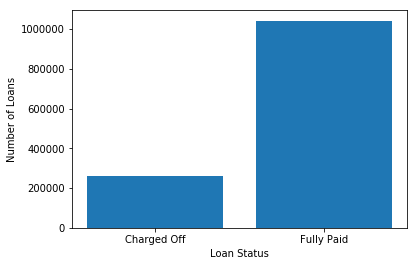

In [12]:
#visualize the number of charged off and paid loans
status_count = df.groupby('loan_status').count()
plt.bar(status_count.index.values, status_count['loan_amnt'])
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()

In [13]:
# get the exact numbers of the chart above
df.loan_status.value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [14]:
# what % of loans are charged off compared to paid off loans?
261655/1041952

0.2511200132059826

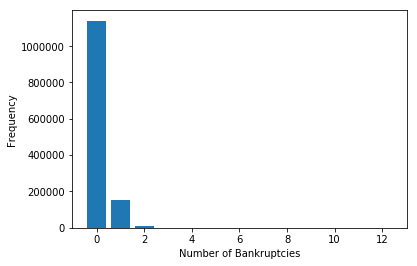

In [15]:
# visualize bankruptcies
bank = df.groupby('pub_rec_bankruptcies').count()
plt.bar(bank.index.values, bank['loan_amnt'])
plt.xlabel('Number of Bankruptcies')
plt.ylabel('Frequency')
plt.show()

In [16]:
df.pub_rec_bankruptcies.value_counts()

0.0     1140180
1.0      153011
2.0        7590
3.0        1539
4.0         381
5.0         136
6.0          45
7.0          15
8.0           9
9.0           2
12.0          1
11.0          1
Name: pub_rec_bankruptcies, dtype: int64

In [17]:
df_high_bank = df[df['pub_rec_bankruptcies'] > 7]
df_high_bank.loan_status.value_counts()

Fully Paid     7
Charged Off    6
Name: loan_status, dtype: int64

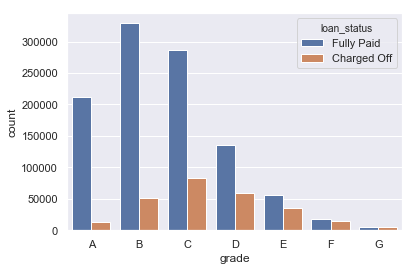

In [82]:
#check grades 
sns.set(style="darkgrid")
ax = sns.countplot(x="grade", data=df, hue="loan_status", 
                   order=["A", "B", "C", "D", "E", "F", "G"])

C:\Users\600846\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


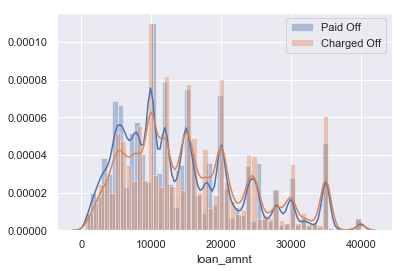

In [56]:
#check distribution of grades for charged off loans

#separate into paid off data and charged off data
df_paid = df[df.loan_status == 'Fully Paid']
df_chargedOff = df[df.loan_status == 'Charged Off']

x = df_chargedOff['loan_amnt']
y =df_paid['loan_amnt']

sns.distplot(y, label='Paid Off')
sns.distplot(x, label='Charged Off')
plt.legend()



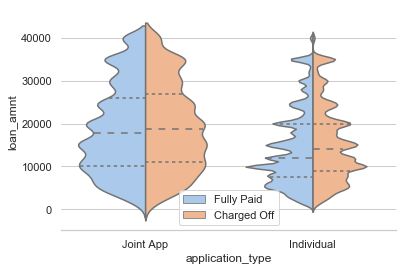

In [66]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="application_type", y="loan_amnt", hue="loan_status",
               split=True, inner="quart",
               data=df)
plt.legend(loc='lower center')
sns.despine(left=True)

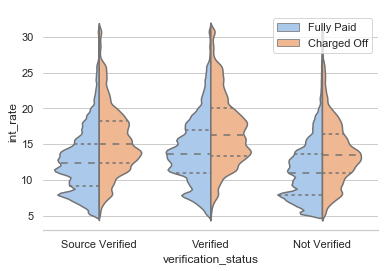

In [63]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="verification_status", y="int_rate", hue="loan_status",
               split=True, inner="quart",
               data=df)
plt.legend(loc='upper right')
sns.despine(left=True)

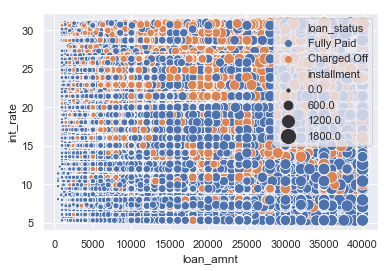

In [68]:
sns.set()
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="loan_amnt", y="int_rate", hue="loan_status", size="installment", sizes=(10,200), data=df)

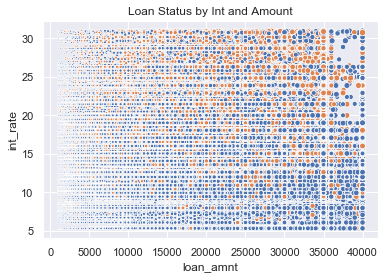

In [265]:
sns.set()
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="loan_amnt", y="int_rate", hue="loan_status", size="installment", 
                     sizes=(2,40), data=df, legend=False).set_title('Loan Status by Int and Amount')

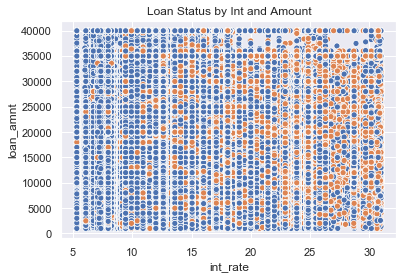

In [264]:
sns.set()
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="int_rate", y="loan_amnt", hue="loan_status", data=df, legend=False).set_title('Loan Status by Int and Amount')

In [261]:
print('hello world')

hello world


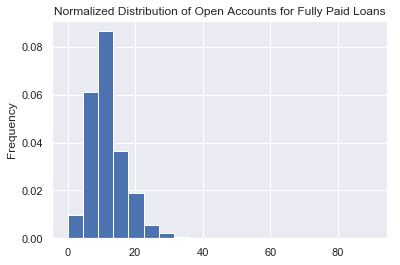

In [266]:
#visualize open accounts for fully paid loans
df_paid.open_acc.plot(kind='hist', bins=20, density=True)
plt.title('Normalized Distribution of Open Accounts for Fully Paid Loans')
plt.show()

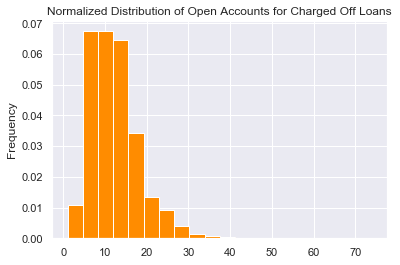

In [267]:
# visualize open accounts for charged off loans
df_chargedOff.open_acc.plot(kind='hist', bins=20, density=True, color='darkorange')
plt.title('Normalized Distribution of Open Accounts for Charged Off Loans')
plt.show()

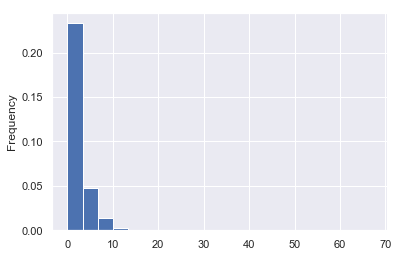

In [91]:
#visualize credit inquiries in the past year for fully paid loans
df_paid.inq_last_12m.plot(kind='hist', bins=20, density=True)
plt.show()

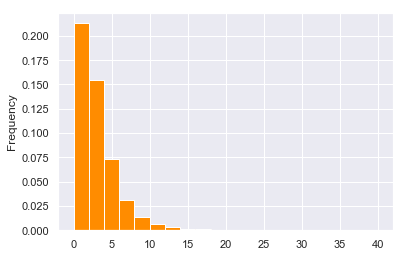

In [90]:
# visualize credit inquiries in the past year for charged off loans
df_chargedOff.inq_last_12m.plot(kind='hist', bins=20, density=True, color='darkorange')
plt.show()

## Correlation Analysis

In [206]:
# conduct correlation analysis on the dataset
df.corr()


,loan_amnt,funded_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,collections_12_mths_ex_med,tot_cur_bal,all_util,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_util,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies
loan_amnt,1.000000,0.999546,0.143817,0.953352,0.310231,0.065217,0.032084,-0.002954,0.186319,-0.066530,0.318618,0.108465,-0.018302,0.315467,0.008552,0.017525,0.009190,0.229859,0.052655,-0.000822,-0.050887,-0.022476,-0.020781,0.090103,0.021247,-0.095317
funded_amnt,0.999546,1.000000,0.143926,0.954028,0.310134,0.065275,0.032496,-0.002752,0.186642,-0.066283,0.318534,0.108654,-0.018195,0.315466,0.008552,0.017525,0.009191,0.229859,0.052648,-0.000739,-0.050889,-0.022478,-0.020783,0.090103,0.021246,-0.095117
int_rate,0.143817,0.143926,1.000000,0.155512,-0.071267,0.258412,0.148388,0.048232,-0.003865,0.053356,-0.027675,0.242760,0.015295,-0.085287,0.264643,0.191143,0.190802,-0.084432,0.253373,0.011249,0.042506,0.026606,0.209506,-0.063062,0.250572,0.058957
installment,0.953352,0.954028,0.155512,1.000000,0.300992,0.051183,0.035679,0.006485,0.176548,-0.054922,0.306791,0.126922,-0.014695,0.284816,0.033859,0.035078,0.022611,0.203650,0.074450,0.001326,-0.042163,-0.016961,-0.000317,0.072467,0.040699,-0.087338
annual_inc,0.310231,0.310134,-0.071267,0.300992,1.000000,-0.041716,-0.141383,0.040608,0.133669,-0.005583,0.284175,0.034613,-0.004048,0.395818,0.007741,0.064250,0.055995,0.306335,-0.004075,0.008967,0.017358,0.007688,0.051953,-0.006887,-0.017461,-0.044400
loan_status,0.065217,0.065275,0.258412,0.051183,-0.041716,1.000000,0.087174,0.020042,0.028803,0.026335,-0.019578,0.061077,0.016101,-0.071765,0.092854,0.056820,0.099994,-0.079835,0.067282,0.003074,0.010223,0.010178,0.085930,-0.010479,0.068555,0.024990
dti,0.032084,0.032496,0.148388,0.035679,-0.141383,0.087174,1.000000,-0.007455,0.229022,-0.031650,0.111136,0.143311,-0.002641,0.004424,0.155584,0.029139,0.122671,-0.088647,0.146417,-0.002899,-0.034461,-0.013933,0.072079,0.074060,0.131327,-0.018128
delinq_2yrs,-0.002954,-0.002752,0.048232,0.006485,0.040608,0.020042,-0.007455,1.000000,0.052494,-0.019993,-0.028359,-0.011607,0.071213,0.057133,0.023393,0.027332,-0.053669,0.044372,-0.009387,0.143376,0.214656,0.655955,-0.024765,-0.444684,-0.011127,-0.046949
open_acc,0.186319,0.186642,-0.003865,0.176548,0.133669,0.028803,0.229022,0.052494,1.000000,-0.018373,0.223345,-0.141085,0.010986,0.244322,-0.007540,0.183979,0.489732,-0.111699,-0.103218,0.006956,0.022455,0.011077,0.366225,0.109191,-0.097017,-0.023150
pub_rec,-0.066530,-0.066283,0.053356,-0.054922,-0.005583,0.026335,-0.031650,-0.019993,-0.018373,1.000000,-0.093554,-0.069545,0.015119,-0.070134,-0.005495,0.086777,0.094814,-0.055435,-0.037075,-0.004349,0.026156,-0.000080,0.084643,-0.028612,-0.045714,0.649393


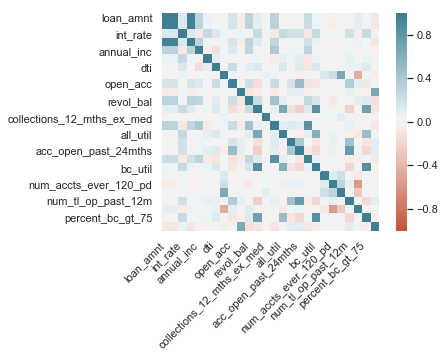

In [207]:
# create correlation heatmap
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Binary Logistic Regression

In [139]:
#prepare the data to be used in the logistic regression analysis
reg_df = df.replace("Fully Paid", 0)
reg_df = df.replace("Charged Off", 1)

reg_df = reg_df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'pub_rec', 'tot_cur_bal']]
reg_df.head(1)

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,pub_rec,tot_cur_bal
100,30000,22.35,1151.16,100000.0,0,30.46,1.0,472330.0


In [154]:
#split data in feature (X) and target variable (y)
feature_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec', 'tot_cur_bal']
X = reg_df[feature_cols]
y = reg_df['loan_status']

In [ ]:
# drop rows with non finite values
with pd.option_context('mode.use_inf_as_null', True):
   reg_df = reg_df.dropna()

In [155]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0 )

In [156]:
# import the class
from sklearn.linear_model import LogisticRegression

In [157]:
#instantiate the model
logreg = LogisticRegression()

In [158]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
y_pred= logreg.predict(X_test)

In [161]:
# Model Evaluation using Confusion Matrix

#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[245897,    106],
       [ 62878,     61]], dtype=int64)

Text(0.5,257.44,'Predicted label')

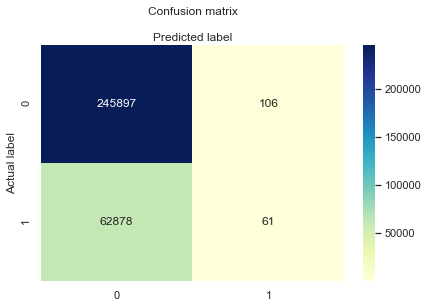

In [163]:
#visualize the confusion matrix using Heatmap
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [164]:
#evaluate confusion matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7961300179321685
Precision: 0.3652694610778443
Recall: 0.0009691923926341378


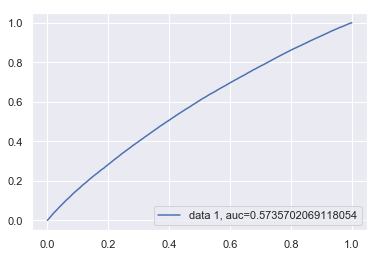

In [165]:
# calculate and visualize the ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Cluster Analysis

In [166]:
#import module
from sklearn.cluster import KMeans


In [199]:
# filter data - based on the data exploration, the two important factors of loans being charged off were interest rate and grade
charged_off = df[['int_rate', 'inq_last_12m']][df.loan_status == 1]
charged_off.shape





(261655, 2)

In [200]:
# drop columns with non finite values
with pd.option_context('mode.use_inf_as_null', True):
   charged_off = charged_off.dropna()

In [201]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(charged_off)

In [202]:
# add new column "label" and assign cluster labels
charged_off['label'] = kmeans.labels_ 

Text(0.5,1,'3 Clusters of Charged Off Loans')

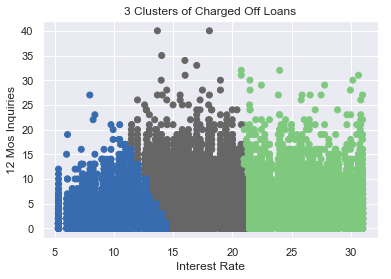

In [204]:
# draw a scatter plot
plt.scatter(charged_off['int_rate'], charged_off['inq_last_12m'], c=charged_off['label'],cmap='Accent')
plt.xlabel('Interest Rate')
plt.ylabel('12 Mos Inquiries')
plt.title('3 Clusters of Charged Off Loans')

## Building a Prediction Model

In [223]:
#prep data by getting rid of non finite numbers
# drop columns with non finite values
with pd.option_context('mode.use_inf_as_null', True):
   df = df.dropna()

In [224]:
#split data in feature (X) and target variable (y)
feature_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec', 'tot_cur_bal']
X = df[feature_cols]
y = df['loan_status']

In [225]:
# split dataset into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [226]:
# import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

In [227]:
# create Gradient Boosting Classifier 
gb = GradientBoostingClassifier()

In [228]:
# train the model using the training sets
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [229]:
y_pred = gb.predict(X_test)

In [230]:
# Evaluate model performance
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7810258757875003
Precision: 0.5808671713695802
Recall: 0.05515438653814736


## Hypothesis Testing

### The hypothesis to be tested - For loans that have defaulted, the average interest rate is 16%. 

In [237]:
# bring in charged off data
df_chargedOff = df[df.loan_status == 1]

In [246]:
# we only need interest rates of charged off loans
hyp = df_chargedOff['int_rate']

In [240]:
# import dependencies
from scipy.stats import norm
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell 

In [247]:
# find mean interest rate
hyp.mean()

16.033324847649524

In [256]:
#conduct t test to see if the mean is greater than 19.99%
stats.ttest_1samp(hyp, 16)

Ttest_1sampResult(statistic=1.9190887415313345, pvalue=0.054975898340892414)

#### The P value is greater than 0.05 so we do not reject the hypothesis.